In [1083]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1084]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Dataset_Uber Traffic (1).csv")

In [1085]:
df

,DateTime,Junction,Vehicles,ID
0,01/11/15 0:00,1,15,20151101001
1,01/11/15 1:00,1,13,20151101011
2,01/11/15 2:00,1,10,20151101021
3,01/11/15 3:00,1,7,20151101031
4,01/11/15 4:00,1,9,20151101041
...,...,...,...,...
48115,30/06/17 19:00,4,11,20170630194
48116,30/06/17 20:00,4,30,20170630204
48117,30/06/17 21:00,4,16,20170630214
48118,30/06/17 22:00,4,22,20170630224


# Missing Value Analysis

In [1087]:
missing_values = df.isnull().sum()

In [1088]:
missing_values

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [1089]:
na_values = df.isna().sum()

In [1090]:
na_values

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [1091]:
duplicates = df.duplicated().sum()

In [1092]:
duplicates

0

### As we can see no missing values , no duplicates and no NA values we can move forward

In [1094]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [1095]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# Lets segregate them into hourly intervals

In [1097]:
print(df['ID'].min(), df['ID'].max())

20151101001 20170630234


In [1098]:
df['ID'] = df['ID'].astype(str)

In [1099]:
df['ID'] = df['ID'].str.zfill(12)

In [1100]:
print(df['ID'].astype(str).str[:15].unique()[:10])

['020151101001' '020151101011' '020151101021' '020151101031'
 '020151101041' '020151101051' '020151101061' '020151101071'
 '020151101081' '020151101091']


In [1101]:
df['DateTime'] = pd.to_datetime(df['ID'].str[1:11], format='%Y%m%d%H')

In [1102]:
df['Hour'] = df['DateTime'].dt.floor('H')

C:\Users\hp\AppData\Local\Temp\ipykernel_10104\2474612736.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Hour'] = df['DateTime'].dt.floor('H')


In [1103]:
Traffic_Hourly = df.groupby(['Hour', 'Junction'])['Vehicles'].sum().reset_index()

In [1104]:
print(Traffic_Hourly)

                     Hour  Junction  Vehicles
0     2015-11-01 00:00:00         1        15
1     2015-11-01 00:00:00         2         6
2     2015-11-01 00:00:00         3         9
3     2015-11-01 01:00:00         1        13
4     2015-11-01 01:00:00         2         6
...                   ...       ...       ...
48115 2017-06-30 22:00:00         4        22
48116 2017-06-30 23:00:00         1        78
48117 2017-06-30 23:00:00         2        27
48118 2017-06-30 23:00:00         3        39
48119 2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]


In [1105]:
Traffic_Hourly['Standardized_Vehicles'] = Traffic_Hourly.groupby('Junction')['Vehicles'].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [1106]:
print(Traffic_Hourly[['Junction', 'Vehicles', 'Standardized_Vehicles']].head(10))

   Junction  Vehicles  Standardized_Vehicles
0         1        15              -1.306174
1         2         6              -1.115103
2         3         9              -0.449790
3         1        13              -1.393099
4         2         6              -1.115103
5         3         7              -0.641434
6         1        10              -1.523487
7         2         5              -1.250215
8         3         5              -0.833078
9         1         7              -1.653874


In [1107]:
# This shows that at Junction 1, even values like 15 or 13 vehicles are below the mean, meaning that Junction 1 likely has higher overall traffic,
# and these values are relatively low compared to its average.

#Similarly, for Junctions 2 and 3, the same logic applies.

In [1108]:
df['HourOfTheDay'] = df['DateTime'].dt.hour                  
df['DayOfWeek'] = df['DateTime'].dt.dayofweek          
df['Month'] = df['DateTime'].dt.month                   


In [1109]:
# Weekends: Saturday is 5 and Sunday is 6
df['Weekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

In [1110]:
df.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1


In [1111]:
df.head(30)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1
5,2015-11-01 05:00:00,1,6,020151101051,2015-11-01 05:00:00,5,6,11,1
6,2015-11-01 06:00:00,1,9,020151101061,2015-11-01 06:00:00,6,6,11,1
7,2015-11-01 07:00:00,1,8,020151101071,2015-11-01 07:00:00,7,6,11,1
8,2015-11-01 08:00:00,1,11,020151101081,2015-11-01 08:00:00,8,6,11,1
9,2015-11-01 09:00:00,1,12,020151101091,2015-11-01 09:00:00,9,6,11,1


# lets add special holidays 

In [1113]:
specialHolidays = pd.to_datetime([
    '2015-01-26', '2015-03-06', '2015-04-03', '2015-07-18', '2015-08-15',
    '2015-09-25', '2015-10-02', '2015-10-22', '2015-11-11', '2015-12-25',
    '2016-01-26', '2016-03-24', '2016-03-25', '2016-07-06', '2016-08-15',
    '2016-09-13', '2016-10-02', '2016-10-11', '2016-10-30', '2016-12-25',
    '2017-01-26', '2017-03-13', '2017-04-14', '2017-06-26', '2017-08-15',
    '2017-09-02', '2017-10-02', '2017-09-30', '2017-10-19', '2017-12-25','2015-04-14', '2016-04-14']) 
df['specialHolidays'] = df['DateTime'].dt.date.isin(specialHolidays.date).astype(int)

In [1114]:
df.tail(100)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays
48020,2017-06-26 20:00:00,4,9,020170626204,2017-06-26 20:00:00,20,0,6,0,1
48021,2017-06-26 21:00:00,4,8,020170626214,2017-06-26 21:00:00,21,0,6,0,1
48022,2017-06-26 22:00:00,4,10,020170626224,2017-06-26 22:00:00,22,0,6,0,1
48023,2017-06-26 23:00:00,4,10,020170626234,2017-06-26 23:00:00,23,0,6,0,1
48024,2017-06-27 00:00:00,4,9,020170627004,2017-06-27 00:00:00,0,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,020170630194,2017-06-30 19:00:00,19,4,6,0,0
48116,2017-06-30 20:00:00,4,30,020170630204,2017-06-30 20:00:00,20,4,6,0,0
48117,2017-06-30 21:00:00,4,16,020170630214,2017-06-30 21:00:00,21,4,6,0,0
48118,2017-06-30 22:00:00,4,22,020170630224,2017-06-30 22:00:00,22,4,6,0,0


In [1115]:
df = df.sort_values(['Junction', 'DateTime'])

lags = [1, 2, 3, 6, 12, 24, 48]

for lag in lags:
    df[f'VehiclesLag_{lag}'] = df.groupby('Junction')['Vehicles'].shift(lag)


In [1116]:
for lag in lags:
    df[f'VehicleDiff_{lag}'] = df['Vehicles'] - df[f'VehiclesLag_{lag}']

In [1117]:
df.head(30)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehiclesLag_12,VehiclesLag_24,VehiclesLag_48,VehicleDiff_1,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1,0,...,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1,0,...,NaN,NaN,NaN,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1,0,...,NaN,NaN,NaN,-3.0,-6.0,-8.0,NaN,NaN,NaN,NaN
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1,0,...,NaN,NaN,NaN,2.0,-1.0,-4.0,NaN,NaN,NaN,NaN
5,2015-11-01 05:00:00,1,6,020151101051,2015-11-01 05:00:00,5,6,11,1,0,...,NaN,NaN,NaN,-3.0,-1.0,-4.0,NaN,NaN,NaN,NaN
6,2015-11-01 06:00:00,1,9,020151101061,2015-11-01 06:00:00,6,6,11,1,0,...,NaN,NaN,NaN,3.0,0.0,2.0,-6.0,NaN,NaN,NaN
7,2015-11-01 07:00:00,1,8,020151101071,2015-11-01 07:00:00,7,6,11,1,0,...,NaN,NaN,NaN,-1.0,2.0,-1.0,-5.0,NaN,NaN,NaN
8,2015-11-01 08:00:00,1,11,020151101081,2015-11-01 08:00:00,8,6,11,1,0,...,NaN,NaN,NaN,3.0,2.0,5.0,1.0,NaN,NaN,NaN
9,2015-11-01 09:00:00,1,12,020151101091,2015-11-01 09:00:00,9,6,11,1,0,...,NaN,NaN,NaN,1.0,4.0,3.0,5.0,NaN,NaN,NaN


In [1118]:
diff_cols = [f'VehicleDiff_{lag}' for lag in lags]
df[diff_cols] = df.groupby('Junction')[diff_cols].transform(lambda x: x.ffill())


In [1119]:
df.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehiclesLag_12,VehiclesLag_24,VehiclesLag_48,VehicleDiff_1,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1,0,...,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1,0,...,NaN,NaN,NaN,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1,0,...,NaN,NaN,NaN,-3.0,-6.0,-8.0,NaN,NaN,NaN,NaN
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1,0,...,NaN,NaN,NaN,2.0,-1.0,-4.0,NaN,NaN,NaN,NaN


In [1120]:
# df[diff_cols] = df[diff_cols].fillna(0)


In [1121]:
# Visulaization

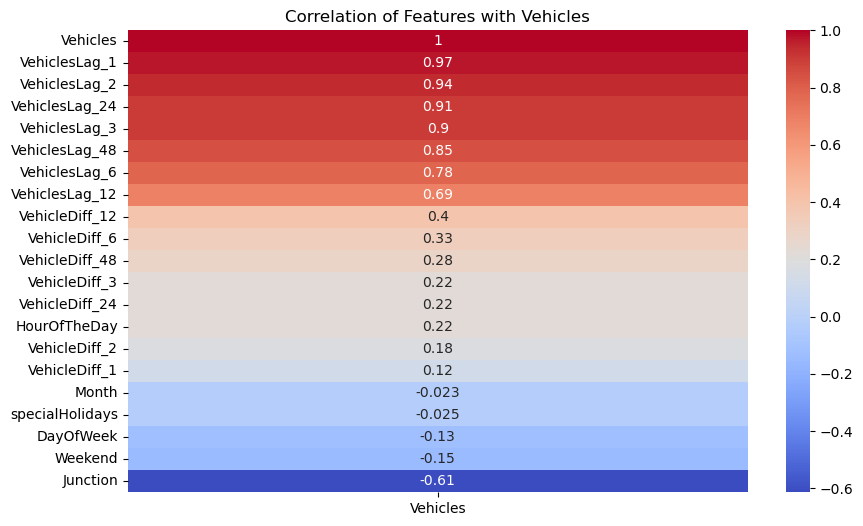

In [1122]:
corr_matrix = df.corr(numeric_only=True)

# Visualize correlation with target variable
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['Vehicles']].sort_values(by='Vehicles', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Vehicles')
plt.show()


In [1123]:
#using xgboost for model based analysis

In [1124]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1125]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# features: excluding target(Vehicles) and datetime
features = [col for col in df.columns if col not in ['DateTime', 'Vehicles']]

df_model = df.dropna(subset=features + ['Vehicles'])

X = df_model[features]
y = df_model['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1126]:
X = X.drop(columns=['ID', 'DateTime'], errors='ignore')


In [1127]:
feature_cols = [col for col in df.columns if col not in ['DateTime', 'Vehicles', 'ID']]
df_model = df.dropna(subset=feature_cols + ['Vehicles'])

X = df_model[feature_cols]
y = df_model['Vehicles']


In [1128]:
df['Hour'] = pd.to_datetime(df['Hour'], errors='coerce').dt.hour


In [1129]:
feature_cols = [col for col in df.columns if col not in ['DateTime', 'Vehicles', 'ID']]


In [1130]:
df_model = df.dropna(subset=feature_cols + ['Vehicles'])

X = df_model[feature_cols]
y = df_model['Vehicles']

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [1131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.55
MAE: 0.16
R² Score: 1.00


<Figure size 1200x800 with 0 Axes>

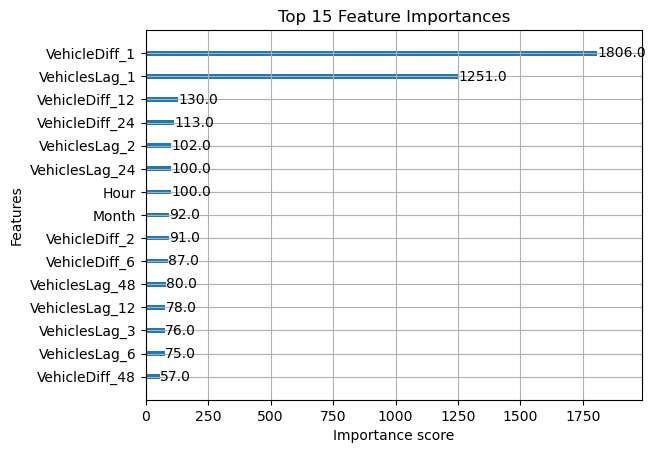

In [1132]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=15)
plt.title("Top 15 Feature Importances")
plt.show()


In [1133]:
#VehicleDiff_1	
#VehiclesLag_1	
#These two seem to have the highest importance score therefore are the most important features of the model.

In [1134]:
# We will be adding weather and special events data

In [1135]:
weather_df = pd.read_csv(r"C:\Users\hp\Desktop\DOCUMENTS&FOLDERS\Uber_Project\delhi_weather_data_nov2015_to_jun2017_new.csv")

In [1136]:
weather_df.head()

,DateTime,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h)
0,1/11/2015 0:00,29.5,78.3,0.46,6.4
1,1/11/2015 1:00,27.5,56.3,0.33,6.7
2,1/11/2015 2:00,29.7,66.0,0.00,6.5
3,1/11/2015 3:00,31.0,55.0,0.19,5.8
4,1/11/2015 4:00,32.9,62.4,0.12,5.6


In [1137]:
df.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehiclesLag_12,VehiclesLag_24,VehiclesLag_48,VehicleDiff_1,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,-3.0,-6.0,-8.0,NaN,NaN,NaN,NaN
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,2.0,-1.0,-4.0,NaN,NaN,NaN,NaN


In [1138]:
# Ensure proper parsing with dayfirst=True
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'], dayfirst=True)

# This line is optional — pandas will automatically display the datetime in the correct format when printed
# but if you need it as a string column in exact 'YYYY-MM-DD HH:MM:SS' format, use:
weather_df['DateTime'] = weather_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [1139]:
weather_df.head()

,DateTime,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h)
0,2015-11-01 00:00:00,29.5,78.3,0.46,6.4
1,2015-11-01 01:00:00,27.5,56.3,0.33,6.7
2,2015-11-01 02:00:00,29.7,66.0,0.00,6.5
3,2015-11-01 03:00:00,31.0,55.0,0.19,5.8
4,2015-11-01 04:00:00,32.9,62.4,0.12,5.6


In [1140]:

weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'])


In [1141]:
df_merged = pd.merge(df, weather_df, on='DateTime', how='left')


In [1142]:
df_merged

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h)
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,-5.0,NaN,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,-6.0,-8.0,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,-1.0,-4.0,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,020170630194,19,19,4,6,0,0,...,-5.0,-5.0,0.0,7.0,2.0,-4.0,37.3,21.1,0.14,10.2
48116,2017-06-30 20:00:00,4,30,020170630204,20,20,4,6,0,0,...,13.0,14.0,20.0,25.0,17.0,7.0,39.7,28.4,0.08,6.9
48117,2017-06-30 21:00:00,4,16,020170630214,21,21,4,6,0,0,...,5.0,-1.0,2.0,9.0,4.0,-1.0,33.3,25.3,0.00,7.6
48118,2017-06-30 22:00:00,4,22,020170630224,22,22,4,6,0,0,...,-8.0,11.0,6.0,7.0,7.0,0.0,40.8,26.4,0.07,8.9


In [1143]:
musicEvents = [
    {"start": "27/11/2015 18:00", "end": "27/11/2015 22:00", "name": "Afrojack Concert"},
    {"start": "28/11/2015 14:00", "end": "28/11/2015 22:00", "name": "NH7 Weekender Day 1"},
    {"start": "29/11/2015 14:00", "end": "29/11/2015 22:00", "name": "NH7 Weekender Day 2"},
    {"start": "05/12/2015 20:00", "end": "06/12/2015 01:00", "name": "DJ Aqeel Bollywood Night"},
    {"start": "12/12/2015 18:00", "end": "12/12/2015 22:00", "name": "Arijit Singh Concert"},
    {"start": "20/03/2016 18:00", "end": "20/03/2016 22:00", "name": "Delhi Jazz Festival Day 1"},
    {"start": "21/03/2016 18:00", "end": "21/03/2016 22:00", "name": "Delhi Jazz Festival Day 2"},
    {"start": "22/03/2016 18:00", "end": "22/03/2016 22:00", "name": "Delhi Jazz Festival Day 3"},
    {"start": "10/02/2017 18:00", "end": "10/02/2017 22:00", "name": "Sunburn Campus Nucleya"},
    {"start": "07/04/2017 18:00", "end": "07/04/2017 21:00", "name": "HCL Classical Day 1"},
    {"start": "08/04/2017 18:00", "end": "08/04/2017 21:00", "name": "HCL Classical Day 2"},
    {"start": "09/04/2017 18:00", "end": "09/04/2017 21:00", "name": "HCL Classical Day 3"}
]


In [1144]:
# Convert music_events into DataFrame with proper datetime format
musicEvents_df = pd.DataFrame(musicEvents)
musicEvents_df['start'] = pd.to_datetime(musicEvents_df['start'], dayfirst=True)
musicEvents_df['end'] = pd.to_datetime(musicEvents_df['end'], dayfirst=True)

In [1145]:
musicEvents_df.head()

,start,end,name
0,2015-11-27 18:00:00,2015-11-27 22:00:00,Afrojack Concert
1,2015-11-28 14:00:00,2015-11-28 22:00:00,NH7 Weekender Day 1
2,2015-11-29 14:00:00,2015-11-29 22:00:00,NH7 Weekender Day 2
3,2015-12-05 20:00:00,2015-12-06 01:00:00,DJ Aqeel Bollywood Night
4,2015-12-12 18:00:00,2015-12-12 22:00:00,Arijit Singh Concert


In [1146]:
# Function to put event name iin the table if DateTime falls in any event interval
def MusicEvent(timestamp):
    for _, row in musicEvents_df.iterrows():
        if row['start'] <= timestamp <= row['end']:
            return row['name']
    return 'None'



In [1147]:
df_merged['MusicEventName'] = df_merged['DateTime'].apply(MusicEvent)


In [1148]:
df_merged['MusicEvent'] = (df_merged['MusicEventName'] != 'None').astype(int)


In [1149]:
df_merged.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h),MusicEventName,MusicEvent
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4,None,0
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7,None,0
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5,None,0
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8,None,0
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6,None,0


In [1150]:
# dropping duplicates

In [1151]:
df_merged.drop_duplicates(inplace=True)

In [1152]:
df_merged.head(30)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h),MusicEventName,MusicEvent
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4,None,0
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7,None,0
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5,None,0
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8,None,0
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6,None,0
5,2015-11-01 05:00:00,1,6,020151101051,5,5,6,11,1,0,...,NaN,NaN,NaN,NaN,34.1,57.6,0.00,5.6,None,0
6,2015-11-01 06:00:00,1,9,020151101061,6,6,6,11,1,0,...,-6.0,NaN,NaN,NaN,31.3,65.4,0.26,5.6,None,0
7,2015-11-01 07:00:00,1,8,020151101071,7,7,6,11,1,0,...,-5.0,NaN,NaN,NaN,26.1,65.0,0.10,5.2,None,0
8,2015-11-01 08:00:00,1,11,020151101081,8,8,6,11,1,0,...,1.0,NaN,NaN,NaN,31.4,63.9,0.17,3.1,None,0
9,2015-11-01 09:00:00,1,12,020151101091,9,9,6,11,1,0,...,5.0,NaN,NaN,NaN,25.1,68.0,0.28,6.2,None,0


In [1153]:
# Handle Missing Values

In [1154]:
df_merged.fillna(method='ffill', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10104\867770795.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)


In [1155]:
# For our model we are using XBoost Regressor so standardising is not required we have cleaned the data and taken care of missing values so now we can move forward.

In [1156]:
df_merged.head(30)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h),MusicEventName,MusicEvent
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4,None,0
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7,None,0
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5,None,0
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8,None,0
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6,None,0
5,2015-11-01 05:00:00,1,6,020151101051,5,5,6,11,1,0,...,NaN,NaN,NaN,NaN,34.1,57.6,0.00,5.6,None,0
6,2015-11-01 06:00:00,1,9,020151101061,6,6,6,11,1,0,...,-6.0,NaN,NaN,NaN,31.3,65.4,0.26,5.6,None,0
7,2015-11-01 07:00:00,1,8,020151101071,7,7,6,11,1,0,...,-5.0,NaN,NaN,NaN,26.1,65.0,0.10,5.2,None,0
8,2015-11-01 08:00:00,1,11,020151101081,8,8,6,11,1,0,...,1.0,NaN,NaN,NaN,31.4,63.9,0.17,3.1,None,0
9,2015-11-01 09:00:00,1,12,020151101091,9,9,6,11,1,0,...,5.0,NaN,NaN,NaN,25.1,68.0,0.28,6.2,None,0


In [1157]:
hourly_avg = df_merged.groupby('HourOfTheDay')['Vehicles'].mean()

In [1158]:
peak_hour = hourly_avg.idxmax()
print(f"Hour with highest average traffic: {peak_hour}")


Hour with highest average traffic: 19


In [1159]:
df_merged['Date'] = df_merged['DateTime'].dt.date

In [1160]:
# Group by each date, then find the hour with max vehicles
dailyPeakHours = df_merged.loc[df_merged.groupby('Date')['Vehicles'].idxmax(), ['Date', 'HourOfTheDay']]
dailyPeakHours = dailyPeakHours.rename(columns={'HourOfTheDay': 'PeakHourOfTheDay'})


In [1161]:
df_merged = df_merged.merge(dailyPeakHours, on='Date', how='left')

In [1162]:
df_merged['PeakHour'] = (df_merged['HourOfTheDay'] == df_merged['PeakHourOfTheDay']).astype(int)

In [1163]:
df_merged['Week'] = df_merged['DateTime'].dt.isocalendar().week
df_merged['Year'] = df_merged['DateTime'].dt.isocalendar().year
df_merged['DayName'] = df_merged['DateTime'].dt.day_name()

In [1164]:
dayWeekTraffic = (
    df_merged.groupby(['Year', 'Week', 'DayName'])['Vehicles']
    .sum()
    .reset_index()
)


In [1165]:
weeklyPeakDays = (
    dayWeekTraffic.loc[
        dayWeekTraffic.groupby(['Year', 'Week'])['Vehicles'].idxmax(), 
        ['Year', 'Week', 'DayName']
    ]
    .rename(columns={'DayName': 'PeakDayOfTheWeek'})
)


In [1166]:
df_merged = df_merged.merge(weeklyPeakDays, on=['Year', 'Week'], how='left')

In [1167]:
df_merged['PeakDay'] = (df_merged['DayName'] == df_merged['PeakDayOfTheWeek']).astype(int)

In [1168]:
# We will be using XGBoost

In [1169]:
# Define features and target
X = df_merged.drop(['Vehicles', 'DateTime'], axis=1)
y = df_merged['Vehicles']

In [1170]:
split_index = int(len(df_merged) * 0.8)

X_train, X_val = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_val = y.iloc[:split_index], y.iloc[split_index:]

In [1171]:
# Check your columns' types
print(X.dtypes)

# Drop object columns
X = X.select_dtypes(include=['number'])


Junction                int64
ID                     object
Hour                    int32
HourOfTheDay            int32
DayOfWeek               int32
Month                   int32
Weekend                 int32
specialHolidays         int32
VehiclesLag_1         float64
VehiclesLag_2         float64
VehiclesLag_3         float64
VehiclesLag_6         float64
VehiclesLag_12        float64
VehiclesLag_24        float64
VehiclesLag_48        float64
VehicleDiff_1         float64
VehicleDiff_2         float64
VehicleDiff_3         float64
VehicleDiff_6         float64
VehicleDiff_12        float64
VehicleDiff_24        float64
VehicleDiff_48        float64
Temperature (°C)      float64
Humidity (%)          float64
Precipitation (mm)    float64
Wind Speed (km/h)     float64
MusicEventName         object
MusicEvent              int32
Date                   object
PeakHourOfTheDay        int32
PeakHour                int32
Week                   UInt32
Year                   UInt32
DayName   

In [1172]:
X_train, X_val = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_val = y.iloc[:split_index], y.iloc[split_index:]

In [1173]:
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [1174]:
y_pred = model.predict(X_val)


In [1175]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 1.14
MAE: 0.25
R² Score: 0.99


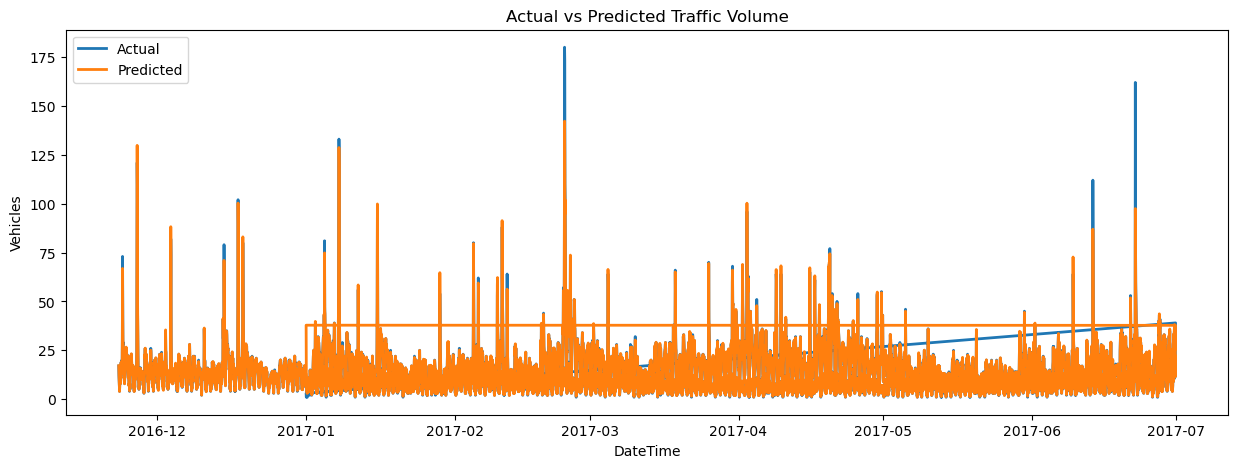

In [1176]:
plt.figure(figsize=(15, 5))
plt.plot(df_merged['DateTime'].iloc[split_index:], y_val, label='Actual', linewidth=2)
plt.plot(df_merged['DateTime'].iloc[split_index:], y_pred, label='Predicted', linewidth=2)
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.title("Actual vs Predicted Traffic Volume")
plt.legend()
plt.show()


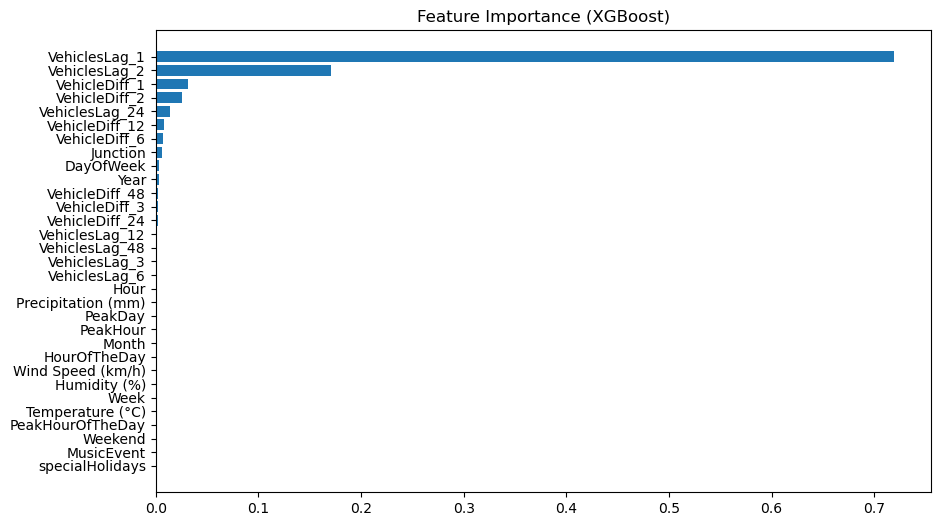

In [1177]:
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importance (XGBoost)")
plt.gca().invert_yaxis()
plt.show()


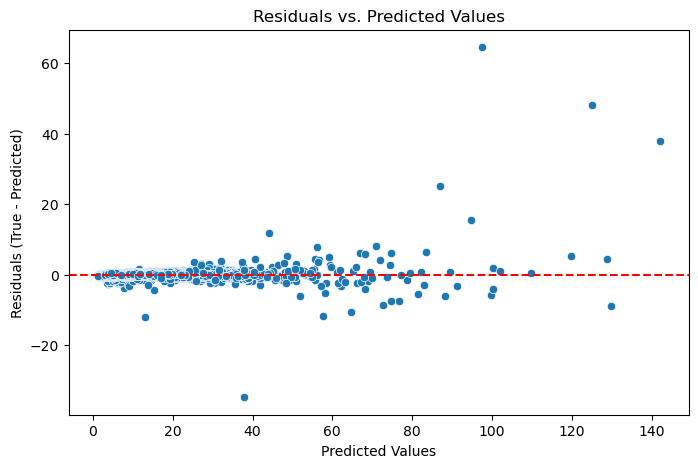

In [1178]:
residuals = y_val - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.show()


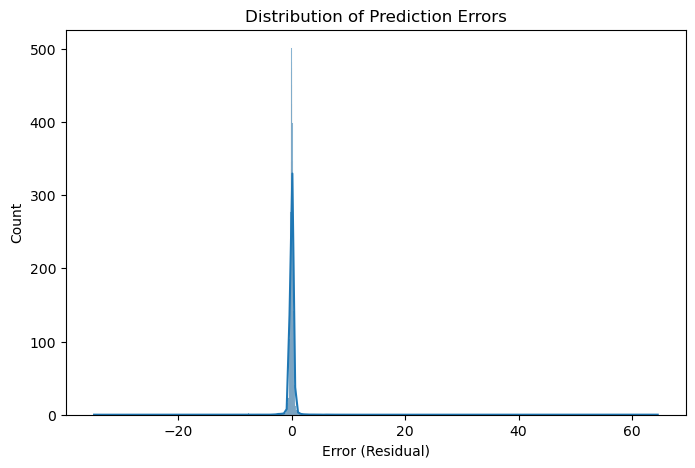

In [1179]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Residual)')
plt.show()


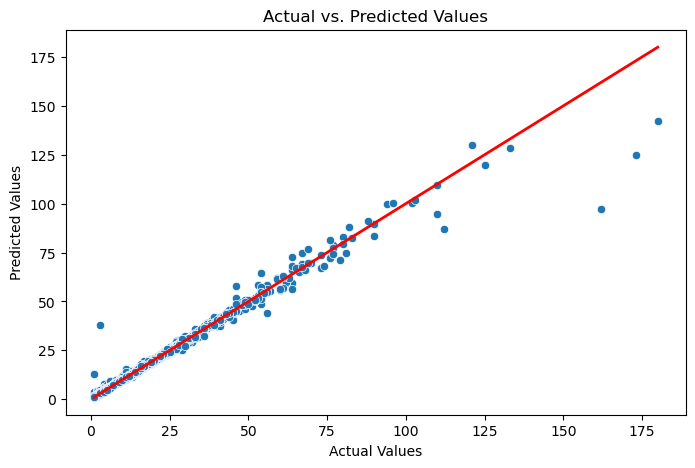

In [1180]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [1181]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\hp\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [1182]:
# This tuning process found that a more aggressive learning rate (0.2) with deeper trees (max_depth=7) and more randomness in data sampling 
# (subsample=0.7) gave the best performance on the validation sets.


In [1183]:
# We will retrain our model based on the new values

In [1184]:
best_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=0.7,
    random_state=42
)
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [1185]:
y_pred = best_model.predict(X_val)

In [1186]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 1.18
MAE: 0.16
R² Score: 0.99


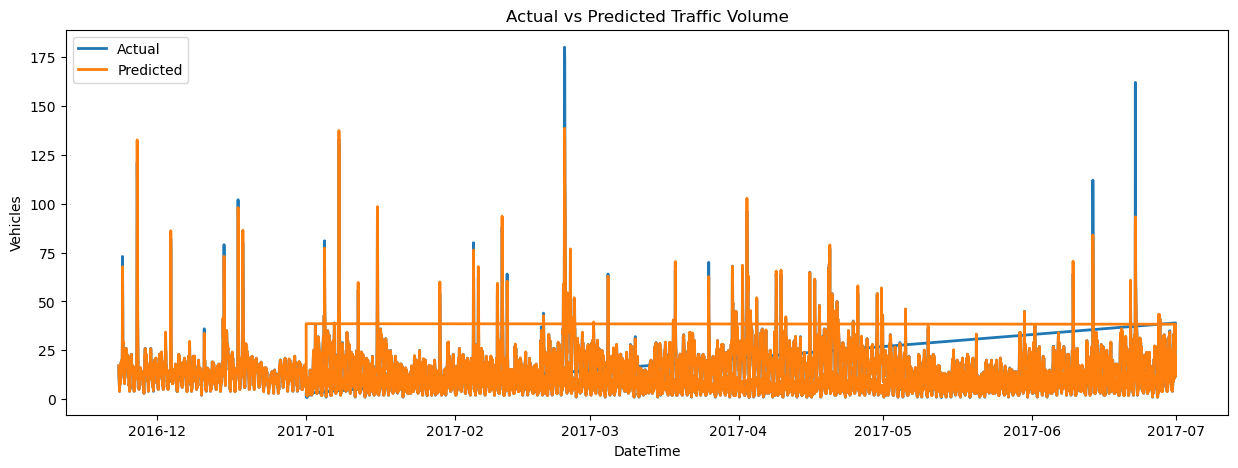

In [1187]:
plt.figure(figsize=(15, 5))
plt.plot(df_merged['DateTime'].iloc[split_index:], y_val, label='Actual', linewidth=2)
plt.plot(df_merged['DateTime'].iloc[split_index:], y_pred, label='Predicted', linewidth=2)
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.title("Actual vs Predicted Traffic Volume")
plt.legend()
plt.show()


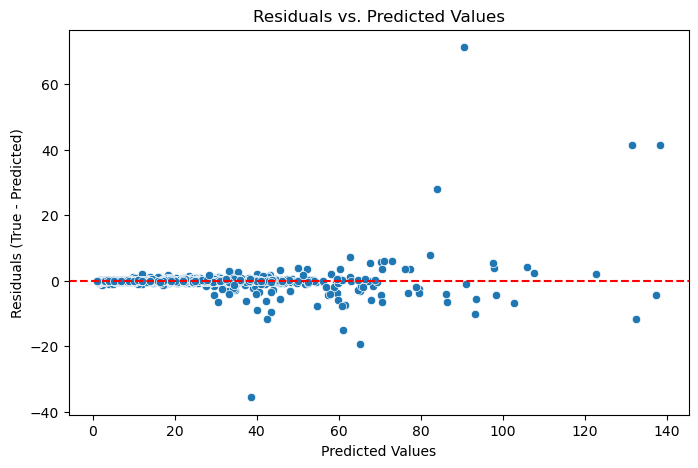

In [1188]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_val - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.show()


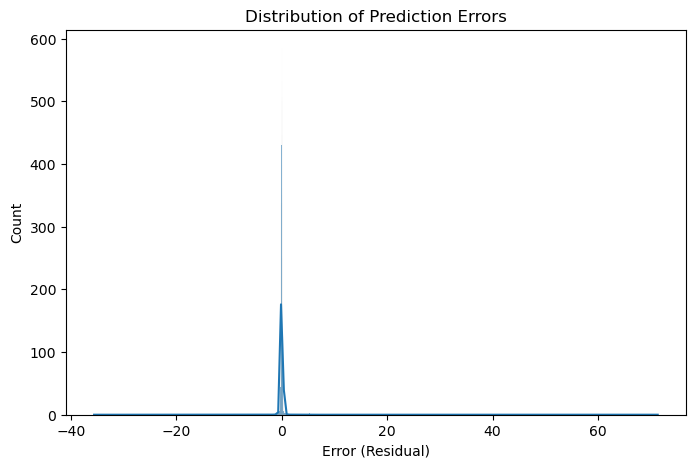

In [1189]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Residual)')
plt.show()


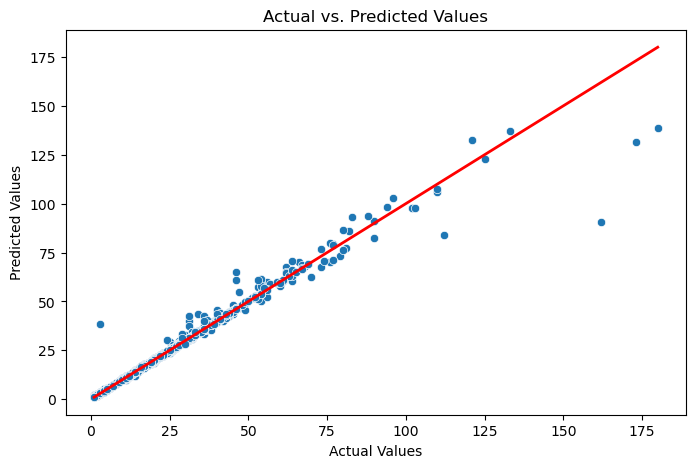

In [1190]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [1191]:
feature_cols = [col for col in df_merged.columns if col != 'Vehicles']  # or a predefined list

X = df_merged[feature_cols]
y = df_merged['Vehicles']

X_train = X.iloc[:split_index].copy()
X_val = X.iloc[split_index:].copy()

y_train = y.iloc[:split_index].copy()
y_val = y.iloc[split_index:].copy()


In [1192]:
invalid_cols = ['Date', 'DateTime', 'ID', 'MusicEventName', 'DayName', 'PeakDayOfTheWeek']
X_train = X_train.drop(columns=invalid_cols)
X_val = X_val.drop(columns=invalid_cols)


In [1193]:
y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)

In [1194]:
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.2275
RMSE: 1.0831
R² Score: 0.9882


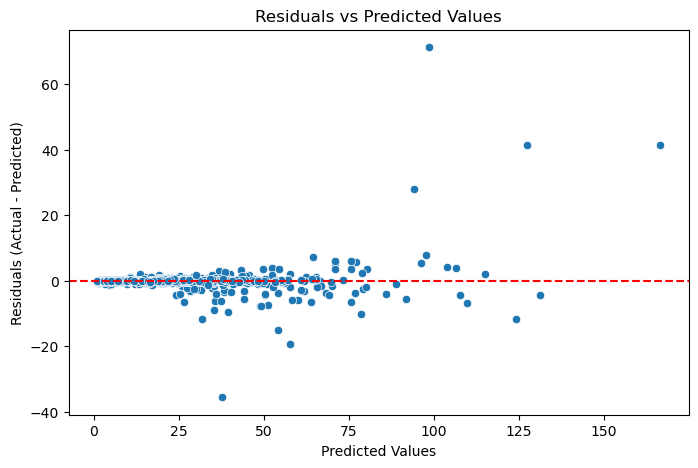

In [1195]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()


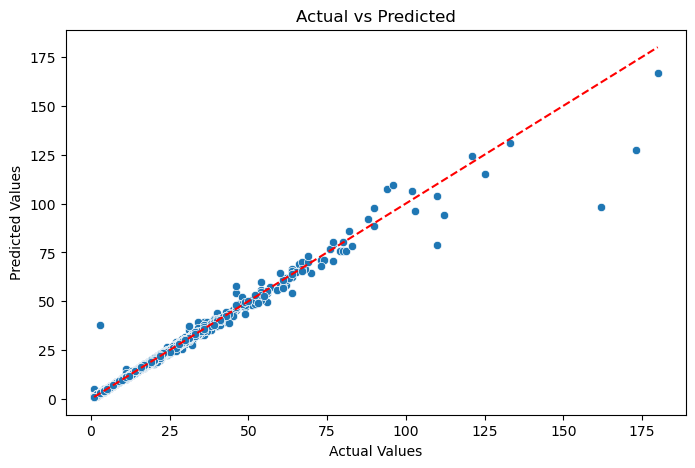

In [1196]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


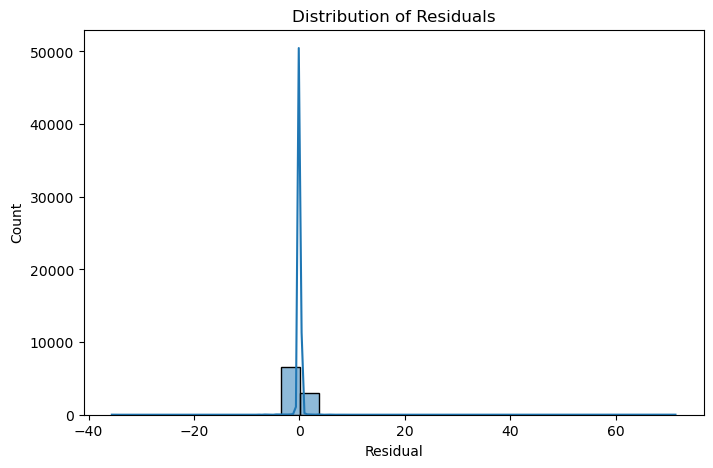

In [1197]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()


In [1198]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [1199]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


In [1200]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train_log)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [1201]:
y_pred_log = grid_search.best_estimator_.predict(X_val)

# Convert back to original scale
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_val_log)


In [1202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.1423
RMSE: 1.1306
R² Score: 0.9871


In [1203]:
residuals = y_true - y_pred


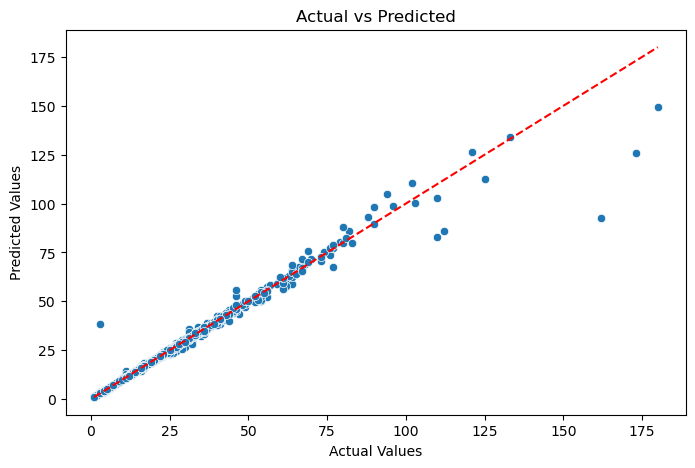

In [1204]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


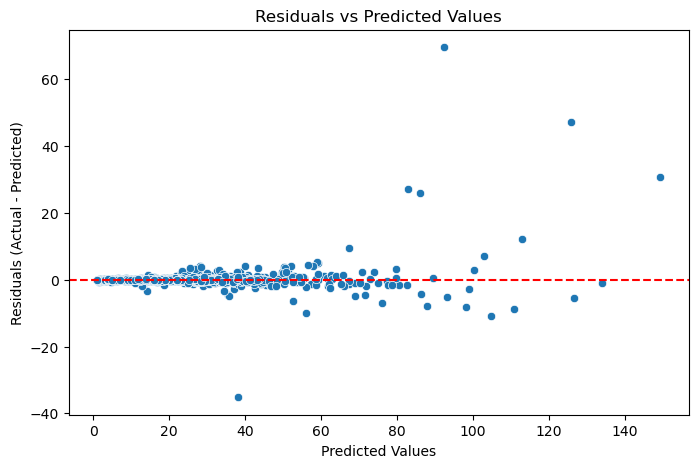

In [1205]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()


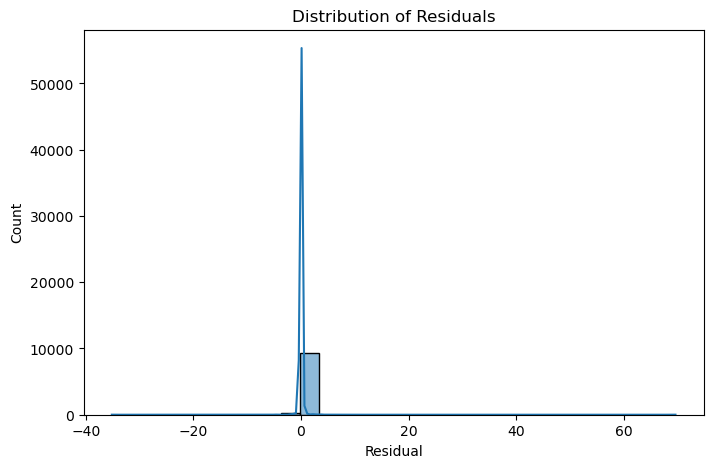

In [1206]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()



In [1207]:
# This  model is log transformed plus grid serach this gives us the best balanced values

In [1208]:
X_cv = X.drop(columns=['DateTime', 'ID', 'MusicEventName', 'Date', 'DayName', 'PeakDayOfTheWeek'])


In [1209]:
print(X_cv.dtypes)



Junction                int64
Hour                    int32
HourOfTheDay            int32
DayOfWeek               int32
Month                   int32
Weekend                 int32
specialHolidays         int32
VehiclesLag_1         float64
VehiclesLag_2         float64
VehiclesLag_3         float64
VehiclesLag_6         float64
VehiclesLag_12        float64
VehiclesLag_24        float64
VehiclesLag_48        float64
VehicleDiff_1         float64
VehicleDiff_2         float64
VehicleDiff_3         float64
VehicleDiff_6         float64
VehicleDiff_12        float64
VehicleDiff_24        float64
VehicleDiff_48        float64
Temperature (°C)      float64
Humidity (%)          float64
Precipitation (mm)    float64
Wind Speed (km/h)     float64
MusicEvent              int32
PeakHourOfTheDay        int32
PeakHour                int32
Week                   UInt32
Year                   UInt32
PeakDay                 int32
dtype: object


In [1210]:
X_cv = X_cv.drop(columns=[
    'DateTime',
    'ID',
    'MusicEventName',
    'Date',
    'DayName',
    'PeakDayOfTheWeek'
], errors='ignore')


In [1211]:
print(X_cv.dtypes)  


Junction                int64
Hour                    int32
HourOfTheDay            int32
DayOfWeek               int32
Month                   int32
Weekend                 int32
specialHolidays         int32
VehiclesLag_1         float64
VehiclesLag_2         float64
VehiclesLag_3         float64
VehiclesLag_6         float64
VehiclesLag_12        float64
VehiclesLag_24        float64
VehiclesLag_48        float64
VehicleDiff_1         float64
VehicleDiff_2         float64
VehicleDiff_3         float64
VehicleDiff_6         float64
VehicleDiff_12        float64
VehicleDiff_24        float64
VehicleDiff_48        float64
Temperature (°C)      float64
Humidity (%)          float64
Precipitation (mm)    float64
Wind Speed (km/h)     float64
MusicEvent              int32
PeakHourOfTheDay        int32
PeakHour                int32
Week                   UInt32
Year                   UInt32
PeakDay                 int32
dtype: object


In [1212]:
print(X_cv.isnull().sum().sum())

192


In [1213]:
X_cv = X_cv.astype({col: 'float64' if 'UInt' in str(X_cv[col].dtype) else X_cv[col].dtype for col in X_cv.columns})

assert all(np.issubdtype(X_cv[col].dtype, np.number) for col in X_cv.columns), "Non-numeric column found!"


In [1214]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Log-transform the target
y_cv = np.log1p(y)

# Set up time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize results
results = {
    'MAE': [],
    'RMSE': [],
    'R2': []
}

# Train & evaluate in each fold
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_cv)):
    X_train_cv, X_val_cv = X_cv.iloc[train_idx], X_cv.iloc[val_idx]
    y_train_cv, y_val_cv = y_cv.iloc[train_idx], y_cv.iloc[val_idx]

    model.fit(X_train_cv, y_train_cv)

    # Predict log values and convert back
    y_pred_log = model.predict(X_val_cv)
    y_pred = np.expm1(y_pred_log)
    y_val_actual = np.expm1(y_val_cv)

    # Store metrics
    results['MAE'].append(mean_absolute_error(y_val_actual, y_pred))
    results['RMSE'].append(mean_squared_error(y_val_actual, y_pred, squared=False))
    results['R2'].append(r2_score(y_val_actual, y_pred))

    print(f"Fold {fold+1}: MAE={results['MAE'][-1]:.2f}, RMSE={results['RMSE'][-1]:.2f}, R2={results['R2'][-1]:.4f}")


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Fold 1: MAE=3.91, RMSE=8.27, R2=0.9144


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Fold 2: MAE=0.37, RMSE=0.50, R2=0.9857


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Fold 3: MAE=0.28, RMSE=0.67, R2=0.9953


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Fold 4: MAE=0.39, RMSE=2.34, R2=0.9458
Fold 5: MAE=0.21, RMSE=1.17, R2=0.9855


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


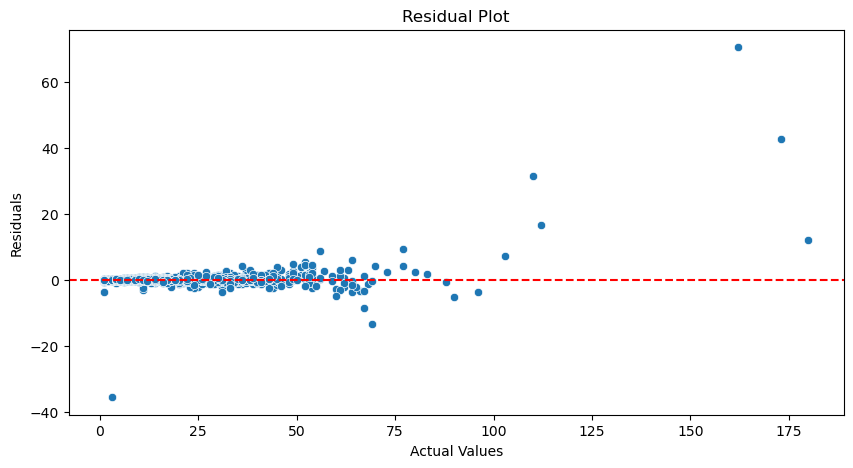

In [1215]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_val_actual - y_pred  # actual - predicted

# Residual plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_val_actual, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [1216]:
residuals_df = pd.DataFrame({
    'actual': y_val_actual,
    'predicted': y_pred,
    'residual': y_val_actual - y_pred
})


In [1217]:
residuals_df = residuals_df.reset_index(drop=True)
X_val_subset = X_val.reset_index(drop=True)[['Hour', 'DayOfWeek', 'Month', 'specialHolidays', 'MusicEvent']]

# Combine them
residuals_df = pd.concat([residuals_df, X_val_subset], axis=1)


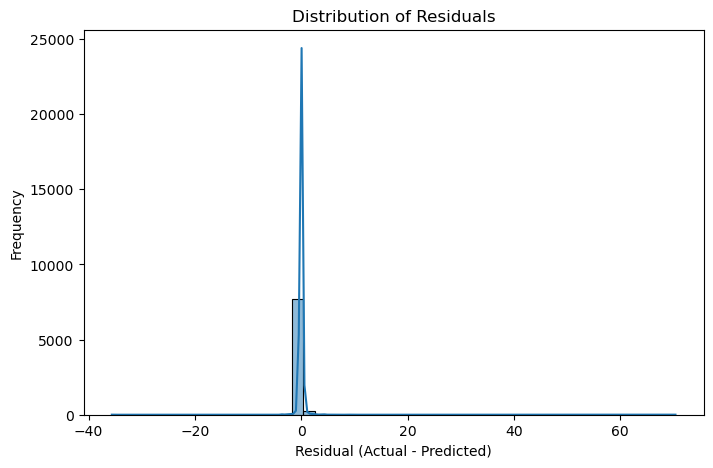

In [1218]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(residuals_df['residual'], bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


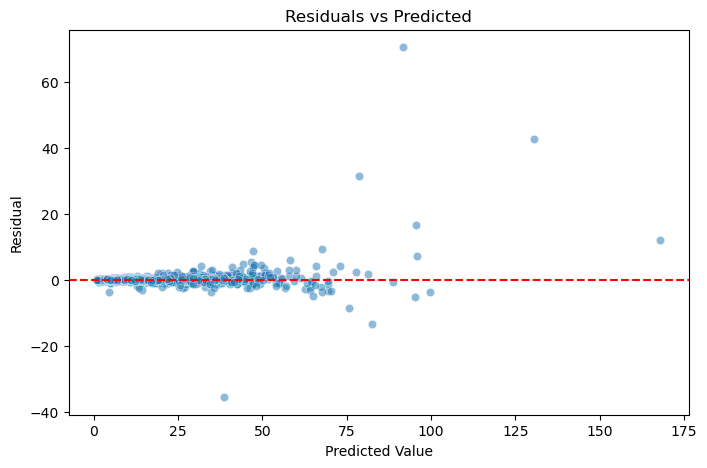

In [1219]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=residuals_df['predicted'], y=residuals_df['residual'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.show()


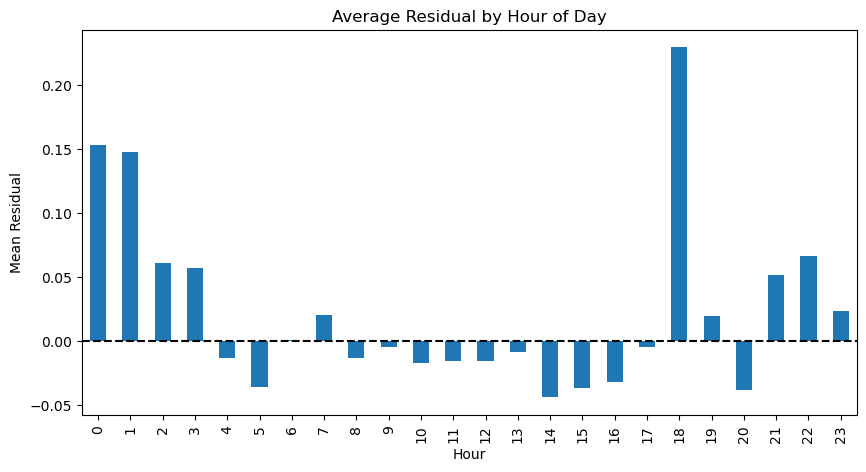

In [1220]:
# Example: by hour
hourly_error = residuals_df.groupby('Hour')['residual'].mean()

plt.figure(figsize=(10, 5))
hourly_error.plot(kind='bar')
plt.title("Average Residual by Hour of Day")
plt.ylabel("Mean Residual")
plt.axhline(0, color='black', linestyle='--')
plt.show()


In [1221]:
holiday_dates = df_merged.loc[df_merged['specialHolidays'] == 1, 'Date'].unique()

def is_near_holiday(current_date):
    return any(abs((current_date - holiday).days) <= 2 for holiday in holiday_dates)

# Step 3: Apply to all rows
df_merged['nearHoliday'] = df_merged['Date'].apply(is_near_holiday).astype(int)


In [1222]:
df_merged['eventWeekend'] = ((df_merged['MusicEvent'] == 1) & (df_merged['DayOfWeek'].isin([5, 6]))).astype(int)


In [1223]:
df_merged['Discomfort_Index'] = 0.5 * (df_merged['Temperature (°C)'] + df_merged['Humidity (%)'])


In [1224]:
df_merged

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,PeakHourOfTheDay,PeakHour,Week,Year,DayName,PeakDayOfTheWeek,PeakDay,nearHoliday,eventWeekend,Discomfort_Index
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,19,0,44,2015,Sunday,Sunday,1,0,0,53.90
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,19,0,44,2015,Sunday,Sunday,1,0,0,41.90
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,19,0,44,2015,Sunday,Sunday,1,0,0,47.85
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,19,0,44,2015,Sunday,Sunday,1,0,0,43.00
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,19,0,44,2015,Sunday,Sunday,1,0,0,47.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,020170630194,19,19,4,6,0,0,...,19,1,26,2017,Friday,Tuesday,0,0,0,29.20
48116,2017-06-30 20:00:00,4,30,020170630204,20,20,4,6,0,0,...,19,0,26,2017,Friday,Tuesday,0,0,0,34.05
48117,2017-06-30 21:00:00,4,16,020170630214,21,21,4,6,0,0,...,19,0,26,2017,Friday,Tuesday,0,0,0,29.30
48118,2017-06-30 22:00:00,4,22,020170630224,22,22,4,6,0,0,...,19,0,26,2017,Friday,Tuesday,0,0,0,33.60


In [1225]:
df_merged['Rain_Wind'] = ((df_merged['Precipitation (mm)'] > 0.1) & (df_merged['Wind Speed (km/h)'] > 20)).astype(int)


In [1226]:
feature_cols = [col for col in df_merged.columns if col != 'Vehicles']  # or a predefined list

# 2. Create feature matrix and target variable
X = df_merged[feature_cols]
y = df_merged['Vehicles']

# 3. Manually split into train and validation sets using index
X_train = X.iloc[:split_index].copy()
X_val = X.iloc[split_index:].copy()

y_train = y.iloc[:split_index].copy()
y_val = y.iloc[split_index:].copy()


In [1227]:

invalid_cols = ['Date', 'DateTime', 'ID', 'MusicEventName', 'DayName', 'PeakDayOfTheWeek']
X_train = X_train.drop(columns=invalid_cols)
X_val = X_val.drop(columns=invalid_cols)


In [1228]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [1229]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


In [1230]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train_log)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [1231]:
y_pred_log = grid_search.best_estimator_.predict(X_val)

# Convert back to original scale
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_val_log)


In [1232]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.1452
RMSE: 1.1156
R² Score: 0.9875


In [1233]:
residuals = y_true - y_pred

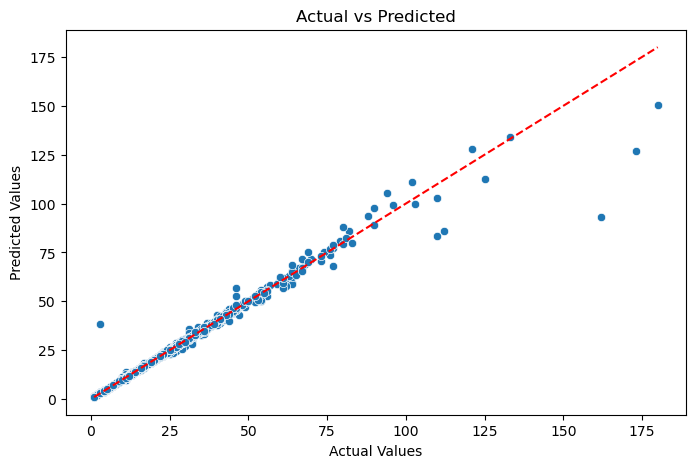

In [1234]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


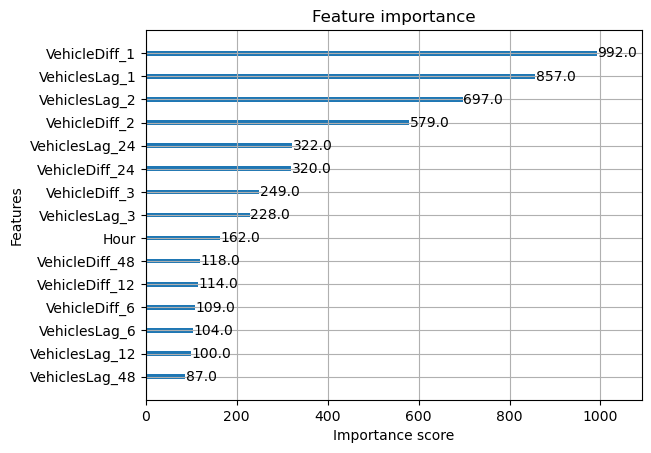

In [1235]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, max_num_features=15)
plt.show()

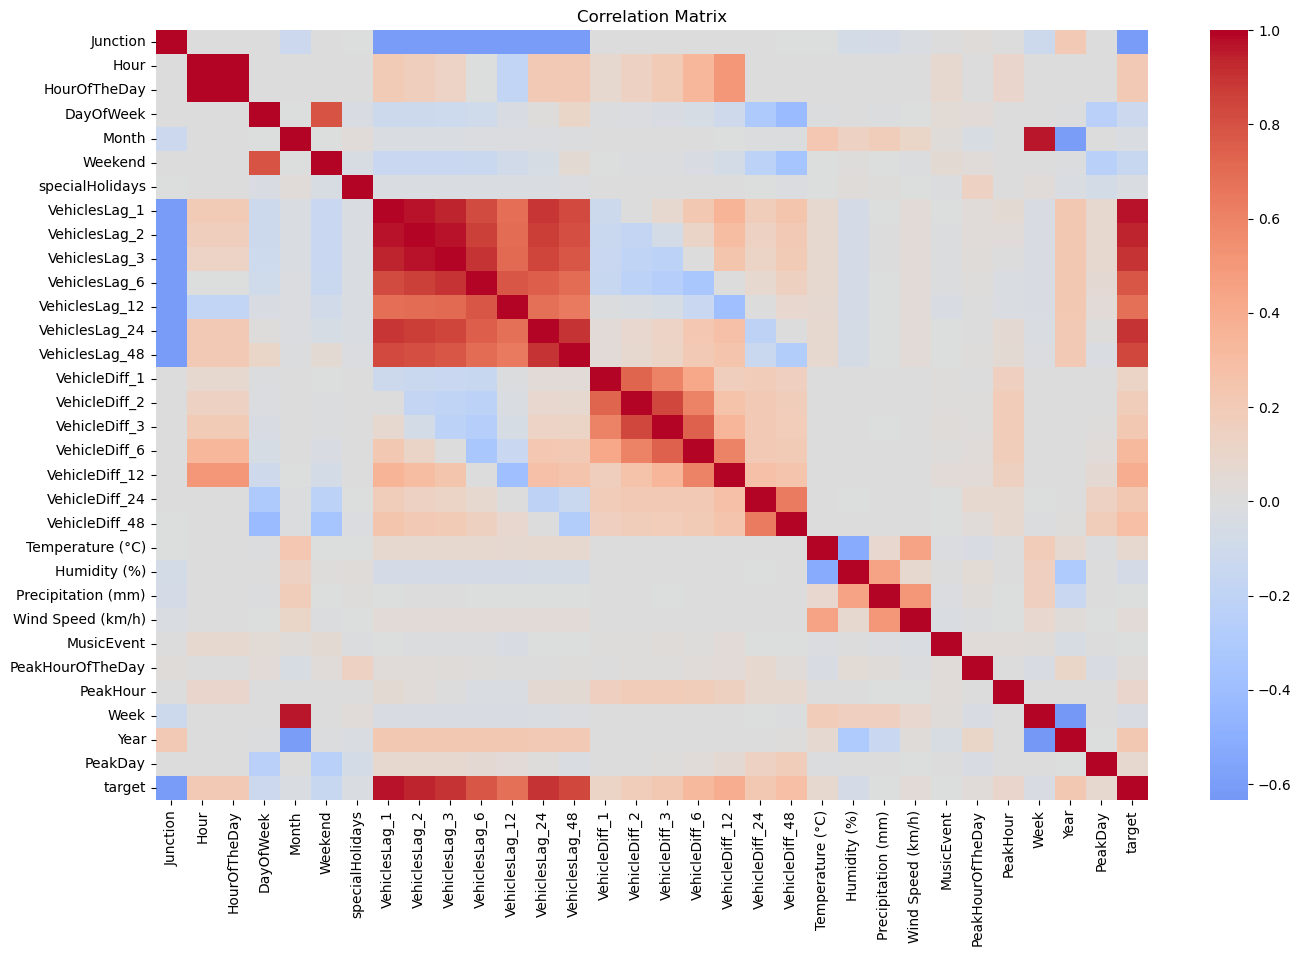

In [1236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X and y for correlation check
df_corr = X_cv.copy()
df_corr['target'] = y  # use untransformed target for clarity

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix')
plt.show()


In [1389]:
df_merged.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,PeakHour,Week,Year,DayName,PeakDayOfTheWeek,PeakDay,nearHoliday,eventWeekend,Discomfort_Index,Rain_Wind
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,0,44,2015,Sunday,Sunday,1,0,0,53.90,0
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,0,44,2015,Sunday,Sunday,1,0,0,41.90,0
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,0,44,2015,Sunday,Sunday,1,0,0,47.85,0
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,0,44,2015,Sunday,Sunday,1,0,0,43.00,0
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,0,44,2015,Sunday,Sunday,1,0,0,47.65,0
